$$\require{mhchem}$$

# Haber-Bosch (18 pts)

The Haber-Bosch process is the most widely used catalytic process in the world, and consumes something like 1-3% of all of the energy produced on Earth. This reaction is the only reason we can feed 7 billion people:
\begin{align*}
\ce{N2 + 3H2 -> 2NH3}
\end{align*}

## Calculate the gas-phase free energy of the reaction at 600 K and 1 atm, assuming standard temperature/pressure for each species using data from the NIST chemistry web book.

In [15]:
import numpy as np

P = 101235    # Pa
R = 8.314/1000 # kJ/mol /K

Hf298 = [0, 0, -45.90]
alpha = [-1, -3, 2]

def Grxn(T):
    SE = [[19.50583,  33.066178,  19.99563],     # A
          [19.88705,  -11.363417, 49.77119],    # B
          [-8.598535, 11.432816,  -15.37599],   # C
          [1.369784,  -2.772874,  1.921168],     # D
          [0.527601,  -0.158558,  0.189174],     # E
          [-4.935202, -9.980797,  -53.30667],   # F
          [212.3900,  172.707974, 203.8591],    # G
          [0.000000,  0.0000000,  -45.89806]]               # H

    SE = np.array(SE).T    
    # Shomate equations
    t = T / 1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0, t**4 / 4.0,
                    -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(SE, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(SE, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component 

    Grxn = np.dot(alpha, Gjo)
    return Grxn

print(f'The free energy change of the reaction is: {Grxn(600):1.4f} kJ/mol of nitrogen reacted.')

The free energy change of the reaction is: 31.7542 kJ/mol of nitrogen reacted.


## Calculate and plot the free energy of reaction as a function of temperature, from 400 to 800 K, at 1 atm and 100 atm.

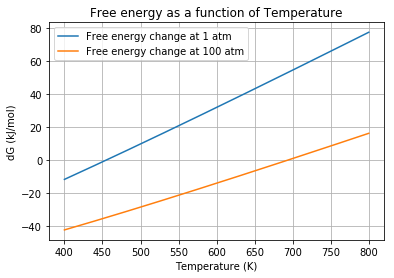

In [3]:
import numpy as np
import matplotlib.pyplot as plt

P0 = 1  # atm
R = 8.314/1000 # kJ/mol/K
Hf298 = np.array([0, 0, -45.90])

def Gj(T):
    
    if T > 100 and T < 500:
        se = [[19.50583,  33.066178,  19.99563],     # A
              [19.88705,  -11.363417, 49.77119],    # B
              [-8.598535, 11.432816,  -15.37599],   # C
              [1.369784,  -2.772874,  1.921168],     # D
              [0.527601,  -0.158558,  0.189174],     # E
              [-4.935202, -9.980797,  -53.30667],   # F
              [212.3900,  172.707974, 203.8591],    # G
              [0.000000,  0.0000000,  -45.89806]]               # H

    elif T > 500:
        se = [[19.50583, 33.066178, 19.99563],     # A
              [19.88705, -11.363417, 49.77119],    # B
              [-8.598535, 11.432816, -15.37599],   # C
              [1.369784, -2.772874, 1.921168],     # D
              [0.527601, -0.158558, 0.189174],     # E
              [-4.935202, -9.980797, -53.30667],   # F
              [212.3900, 172.707974, 203.8591],    # G
              [0.00000,  0.00000000, -45.89806]]   # H

    SE = np.array(se).T    
    # Shomate equations
    t = T / 1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0, t**4 / 4.0,
                    -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])
    
    H = np.dot(SE, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(SE, T_S / 1000.0)  # absolute entropy kJ/mol/K
    
    Gjo = Hf298 + H - T * S       # Gibbs energy of each component 
    
    return Gjo  

def dG(T, P):
    G = Gj(T) + R * T * np.log(P/P0) 
    Gtot = np.dot(alpha, G)
    return Gtot

alpha = np.array([-1, -3, 2])
Tspan = np.linspace(400, 800, 500)

FE1 = [dG(i, 1 * P0) for i in Tspan]
FE100 = [dG(i, 100 * P0) for i in Tspan]

plt.plot(Tspan, FE1, label = 'Free energy change at 1 atm')
plt.plot(Tspan, FE100, label = 'Free energy change at 100 atm')
plt.xlabel('Temperature (K)')
plt.ylabel('dG (kJ/mol)')
plt.title('Free energy as a function of Temperature')
plt.legend()
plt.grid()
plt.show()

## Based on the plot from 1.2, estimate an upper limit of temperature if we want this reaction to proceed reasonably to the products at 100 atm

In [4]:
from scipy.optimize import fsolve
ans, = fsolve(dG, 700, args = (100*P0,))
print(f'''The upper limit of temperature beyond which Gibb's Free Energy is
postitve is: {ans:1.3f} K.''')

The upper limit of temperature beyond which Gibb's Free Energy is
postitve is: 694.888 K.


## As the pressure is increased, why does the equilibrium conversion increase or decrease?

As pressure is increased, the equilibrium conversion increases because we have a decrease in number of moles in the forward reaction and following Le Chatalier's priciple, the reaction proceeds in direction which leads to decrease in moles and thus in forward direction.

## For a fixed reactor (no inlet/outlet) starting with a 3:1 mixture of H2 to N2 (total 1 mol), plot the free energy of reaction as a function of reaction extent at 650K and 1 atm. Include the curve for 100 atm on the same graph.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


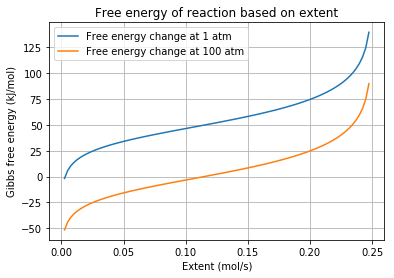

In [5]:
import numpy as np

T = 650  # K
Alpha = np.array([-1, -3, 2])
n0 = np.array([0.25, 0.75, 0])
P0 = 1  # Pa

def FE(Xi, T, P):
    n = n0 + Xi * Alpha
    x = n / np.sum(n)        # mole fraction
        
    G = Gj(T) + R * T * np.log(x * P / P0) 
    Grxn = np.dot(Alpha, G)
    return Grxn    
    
Xispan = np.linspace(0, 0.25, 100)
FE1 = [FE(i, 650, 1 * P0) for i in Xispan]
FE100 = [FE(i, 650, 100 * P0) for i in Xispan]

plt.plot(Xispan, FE1, label = 'Free energy change at 1 atm')
plt.plot(Xispan, FE100, label = 'Free energy change at 100 atm')
plt.xlabel('Extent (mol/s)')
plt.ylabel('Gibbs free energy (kJ/mol)')
plt.title('Free energy of reaction based on extent')
plt.legend()
plt.grid()
plt.show()

## Based on your calculations from 1.5, solve for the equilibrium extent of reaction (the extent where G_rxn=0). Hint: be careful with your initial guess, use one that is close the solution by eye from above

In [6]:
X1, = fsolve(FE, 0.001, args=(650, P0))
X100, = fsolve(FE, 0.1, args=(650, 100*P0))
print(f'''The Equilibrium extent of reaction at:
1 atm is {X1:1.3f} mol,
100 atm is {X100:1.3f} mol.''')

The Equilibrium extent of reaction at:
1 atm is 0.003 mol,
100 atm is 0.115 mol.


## Use matplotlib to make a 2d contour plot of the conversion as a function of temperature/pressure, from T=300K to 900K and P from 1 atm to 150 atm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


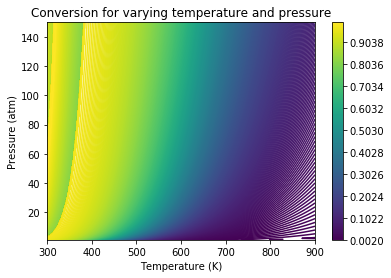

In [7]:
t = np.linspace(300,900, 600)  # K
p = np.linspace(P0, 150*P0, 150)

Tsp, Psp = np.meshgrid(t, p)

def Conv(T, P):
    Xi = fsolve(FE,0.001, args = (T, P))
    x = Xi / 0.25
    return x

z = np.zeros((600, 150))
for i in range(len(t)):
    for j in range(len(p)):

        z[i][j] = Conv(t[i], p[j])

plt.contour(Tsp, Psp, z.T, levels = np.linspace(0, 1, 500))
plt.ylabel('Pressure (atm)')
plt.xlabel('Temperature (K)')
plt.title('Conversion for varying temperature and pressure')
plt.colorbar()
plt.show()

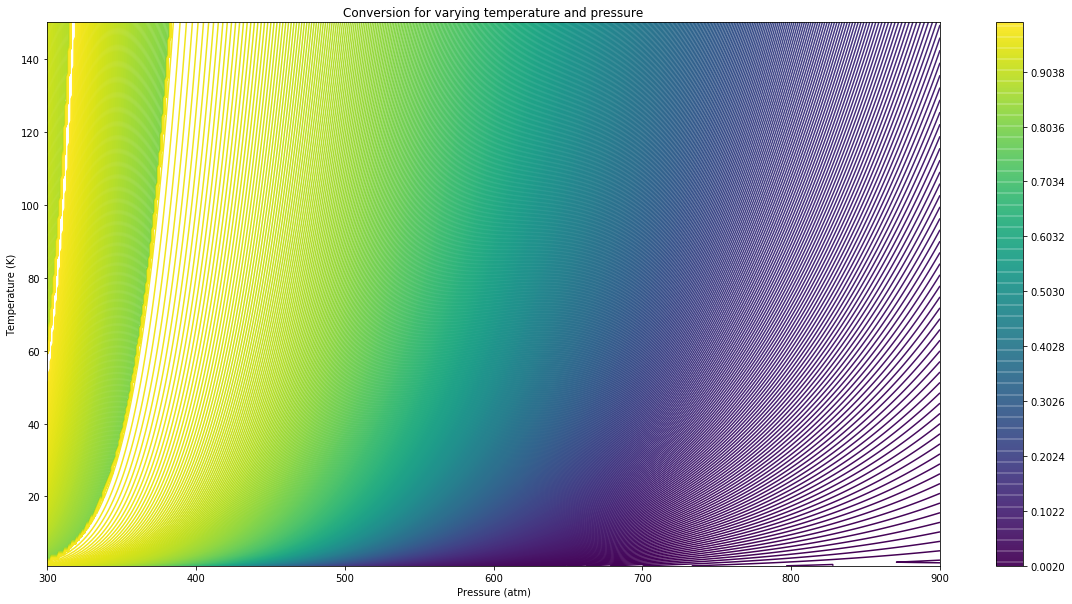

In [8]:
# Magnifying the output

plt.figure(figsize=(20,10))
plt.contour(Tsp, Psp, z.T, levels = np.linspace(0, 1, 500))
plt.xlabel('Pressure (atm)')
plt.ylabel('Temperature (K)')
plt.title('Conversion for varying temperature and pressure')
plt.colorbar()
plt.show()

## Say the rate constant is elementary (it's not and we'll discuss why later on, but let's pretend it is) with a rate constant $k_1=10^{-3} \exp(-103 [kJ/mol] / RT)$ [mol/L/s/atm^4] with activity in the rate law as $P_i$[atm]. Solve for the equilibrium extent of reaction of a 10 m^3 reactor with gas inlet feed of 3:1 H2:N2 at 1mol/s total. Assume a pressure of 100 atm, which is about typical for industrial Haber-Bosch reactors, and a temperature of 650K.

In [10]:
import numpy as np
from scipy.optimize import fsolve

P = 100 # atm
T = 650 # K
V = 10000  # L
v = 1 # mol/s
F0 = np.array([0.25, 0.75, 0])   # mol/s
Alpha = np.array([-1, -3, 2])

def f(Xi, T):
    k1 = 10**(-3) * np.exp(-103/(R * T))
    yN2 = (0.25 - Xi) / (1 - 2*Xi)
    yH2 = 3 * (0.25 - Xi) / (1 - 2*Xi)
    yNH3 = (2 * Xi) / (1 - 2*Xi)
    PN2 = P * yN2
    PH2 = P * yH2
    PNH3 = P * yNH3
    
    Keq = np.exp(-Grxn(T) / (R*T))
    rN2 = k1 * (PN2 * PH2**3 - PNH3**2 / Keq)
    return Xi - rN2 * V

ans, = fsolve(f, 0.2, args = (650))  
print(f'The equilibrium extent of rection is {ans:1.4f} mol/s.')

The equilibrium extent of rection is 0.0971 mol/s.


## Plot the conversion as a function of temperature (400 to 800 K)  at 100 bar

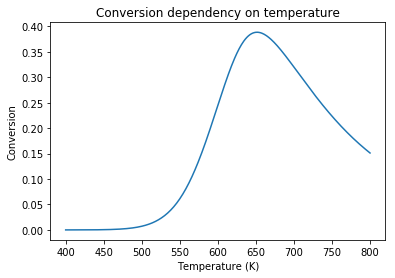

In [11]:
conv = np.ones(401)

def Conv2(T):
    Xi, = fsolve(f, 0.2, args = (T))  
    x = Xi / 0.25
    return x

Trange = np.linspace(400,800, 401)  # K

def fn(Tr):
    for i in range(len(Tr)):
        conv[i] = Conv2(Tr[i])
    return conv

    
plt.plot(Trange, fn(Trange))
plt.ylabel('Conversion')
plt.xlabel('Temperature (K)')
plt.title('Conversion dependency on temperature')
plt.show()

## Discuss why there is an optimum in this case.

At lower temperatures, the rate of reaction is very less that results in lower conversion.

Also, the reaction is exothermic, and hence at higher temperature the backward reaction increases.

Hence, we obtain an optimum conversion at some intermediate temperature.

## Find the optimal temperature for this reactor for maximum conversion.

In [12]:
from scipy.optimize import fmin

def NegConv(T):
    Xi, = fsolve(f, 0.2, args = (T))  
    x = Xi / 0.25
    return -x


ans, = fmin(NegConv, 660, disp=0)
print(f'The maximum conversion at 100 atm is achieved at: {ans:1.2f} K.')

The maximum conversion at 100 atm is achieved at: 651.53 K.


# Reaction engineering questions (2 pt)

Ask one question on piazza.  Post the link here (for example, https://piazza.com/class/jl5aabbtksz62s?cid=190).

https://piazza.com/class/jl5aabbtksz62s?cid=313

## Bonus (1pt)

Answer someone else's question on Piazza. Post the link here.

https://piazza.com/class/jl5aabbtksz62s?cid=319